Use Python (pandas or SQL) to visualize one query result (e.g., bar chart of sales of a specific country (e.g., UK)). Save as image.

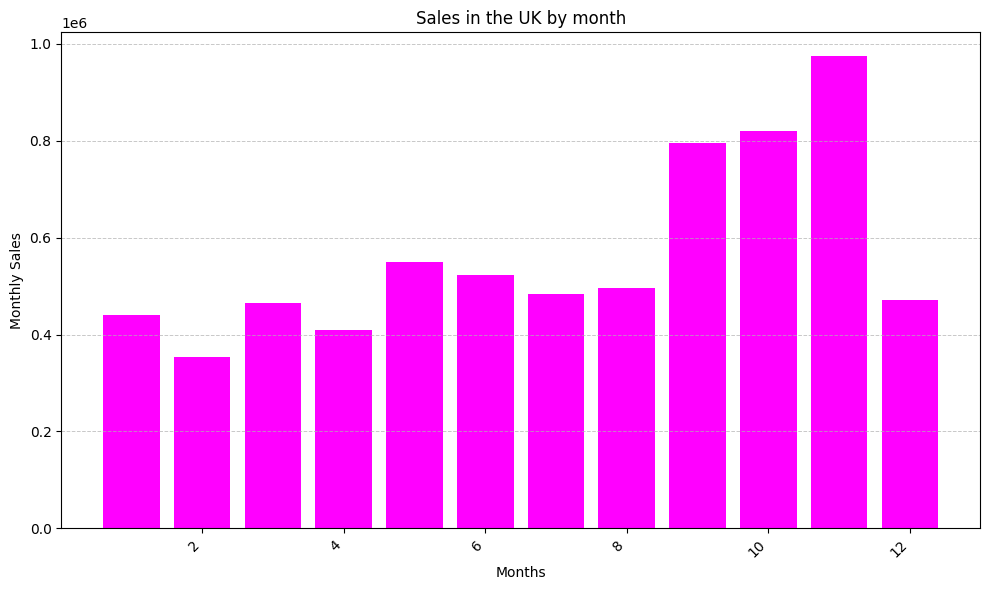

In [14]:
# Importing the necessary libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Connecting to SQLite
conn = sqlite3.connect(r"C:\Users\Admin\Desktop\hetal\COURSES\SEM 2_3\DSA 2040_Data_Warehousing_and_Mining\FINAL_EXAM\DSA-2040_Practical_Exam_Hetal_207\SECTION_1_Task_2\retail_dw.db")

# Running drill-down query of sales in the UK by month
drill_down_query = """
SELECT 
    td.Year,
    td.Month,
    SUM(sf.TotalSales) AS MonthlySales
FROM SalesFact sf
JOIN TimeDim td ON DATE(sf.InvoiceDate) = td.Date
WHERE sf.Country = 'United Kingdom'
GROUP BY td.Year, td.Month
ORDER BY td.Year, td.Month;
"""
df = pd.read_sql_query(drill_down_query, conn)
conn.close()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(df['Month'], df['MonthlySales'], color='magenta')
plt.xticks(rotation=45, ha='right')

# adding titles and labels
plt.title("Sales in the UK by month")
plt.ylabel("Monthly Sales")
plt.xlabel("Months")

# Adding gridlines
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.tight_layout() # avoiding overlap
plt.savefig("Monthly_Sales_of_UK.png")  # Save image
plt.show() # Diplay image


**Insigts:**

- From the bar chart above, the y-axis labels are short this is because they are large numbers. 1e6 is short for 1,000,000. Therefore to read the values, 0.4 x 1,000,000 = 400,000 and so on.

- As seen from the graph above, there is a general upward trend in sales. The sales for every month are relatively greater than 400,000 sterling apart from the month of February which is slightly less than 400,000 sterling.

- The months of September, October, and November have a sharp increase in sales compared to the other months. This suggests increases in sales in months closer to Christmas season/holiday season.

- This seasonal trend can help with stock planning and providing promotions/discounts to lure more customers.

- However, right after the sudden spike in monthly sales for months 9, 10, 11, there is a significant drop in sales in the month of December. 